In [3]:
import larcv
import numpy
from matplotlib import pyplot as plt

In [4]:
f_all  = "/data/datasets/NEXT/NEW-simulation/tl208/simulated-tl208-dev.h5"
f_cuts = "/data/datasets/NEXT/NEW-simulation/tl208/simulated-tl208-dev-cuts.h5"

In [5]:
def get_energy_and_label(f_name):
    io = larcv.IOManager()
    io.add_in_file(f_name)
    io.initialize()
    print(io.product_list())
    print(io.producer_list("cluster3d"))

    true_energy = []
    si_energy   = []
    label       = []
    mc_dep_e    = []

    for i_entry in range(io.get_n_entries()):
        io.read_entry(i_entry)

        pmaps = io.get_data("sparse3d","S2Si").at(0)
        summed_energy = numpy.sum(pmaps.values())
        si_energy.append(summed_energy)

        e_deps = io.get_data("cluster3d","mc_hits").at(0)

        mc_energy = 0.0
        for cluster in e_deps.as_vector():
            mc_energy += numpy.sum(cluster.values())
        mc_dep_e.append(mc_energy)

        p_label = io.get_data("particle", "event")
        # print(p_label.at(0).energy_init())
        label.append(p_label.at(0).pdg_code())
        true_energy.append(p_label.at(0).energy_init())
        
    return numpy.asarray(true_energy), numpy.asarray(si_energy), numpy.asarray(label), numpy.asarray(mc_dep_e)




In [6]:
true_energy, si_energy, label, mc_dep_e = get_energy_and_label(f_all)

['bbox3d', 'cluster3d', 'particle', 'particle', 'sparse2d', 'sparse3d']
['mc_hits']
    [NORMAL]  <IOManager::prepare_input> Opening a file in READ mode: "/data/datasets/NEXT/NEW-simulation/tl208/simulated-tl208-dev.h5"
    [NORMAL]  <IOManager::prepare_input> File "/data/datasets/NEXT/NEW-simulation/tl208/simulated-tl208-dev.h5" has 3278 entries
    [NORMAL]  <IOManager::initialize> Prepared input with 3278 entries...


[  0   0   0   0   0   0   0   0   0   0   0   1   3   4   9  15  29  18
  23  32  64 106  96  29  16  17   7  15   5   4   4   3   5   9   5   2
   1   1   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0]
[ 4125.  4375.  4625.  4875.  5125.  5375.  5625.  5875.  6125.  6375.
  6625.  6875.  7125.  7375.  7625.  7875.  8125.  8375.  8625.  8875.
  9125.  9375.  9625.  9875. 10125. 10375. 10625. 10875. 11125. 11375.
 11625. 11875. 12125. 12375. 12625. 12875. 13125. 13375. 13625. 13875.
 14125. 14375. 14625. 14875. 15125. 15375. 15625. 15875. 16125. 16375.
 16625. 16875. 17125. 17375. 17625. 17875. 18125. 18375. 18625. 18875.
 19125. 19375. 19625.]


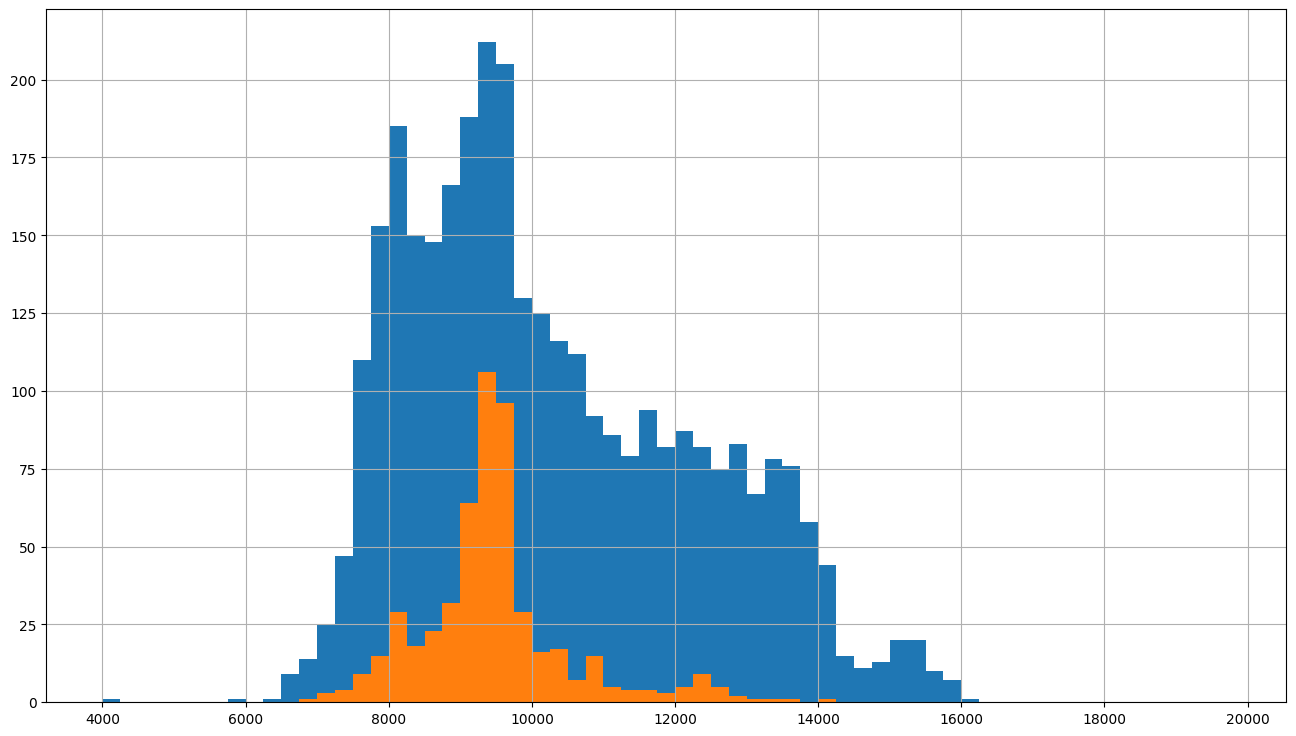

In [28]:
plt.figure(figsize=(16,9))

sig_mask = label==1
bkg_mask = label==0

bins = numpy.arange(4000,20000, 250)
width= bins[1] - bins[0]
def histogram(data_arr, bins):
    counts, edges = numpy.histogram(data_arr, bins)

    return counts, 0.5*(edges[1:] + edges[:-1])

sig_counts, sig_x = histogram(si_energy[sig_mask], bins)
bkg_counts, bkg_x = histogram(si_energy[bkg_mask], bins)
plt.bar(sig_x, bkg_counts, bottom=sig_counts, width=width)
plt.bar(sig_x, sig_counts, width=width)

plt.grid(True)
plt.show()

In [17]:
plt.figure(figsize=(16,9))

sig_mask = label==1
bkg_mask = label==0

bins = numpy.arange(4000,20000, 5)
def histogram(data_arr, bins):
    counts, edges = numpy.histogram(data_arr, bins)

    return counts, 0.5*(edges[1:] + edges[:-1])

sig_counts, sig_x = histogram(si_energy[sig_mask])

plt.bar(sig_x, sig_counts)
# plt.hist(si_energy[bkg_mask], bins=100, zorder=3)

plt.grid(True)
plt.show()

TypeError: histogram() missing 1 required positional argument: 'bins'

<Figure size 1600x900 with 0 Axes>

In [8]:
numpy.sum(label==1)

525

In [9]:
numpy.sum(label==0)

2753